Problem Statement

Sentiment analysis remains one of the key problems that has seen extensive application of natural language processing. This time around, given the tweets from customers about various tech firms who manufacture and sell mobiles, computers, laptops, etc, the task is to identify if the tweets have a negative sentiment towards such companies or products.

We will work on this problem and then classify the tweets as positive or negetive sentiment

In [0]:
# importing the libraries for data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
sns.set()
import re
import nltk
# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')


# html embedding
from IPython.display import Javascript
from IPython.core.display import display
from IPython.core.display import HTML

In [0]:
train = pd.read_csv('train_sentiment.csv')
test = pd.read_csv('test_sentiment.csv')

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
id       7920 non-null int64
label    7920 non-null int64
tweet    7920 non-null object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [0]:
train.tail()

,id,label,tweet
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...
7919,7920,0,Apple Barcelona!!! #Apple #Store #BCN #Barcelo...


In [0]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [0]:
# checking for null values in the train and test data

train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [0]:
#checking for positive sentiments in the train data

train[train['label'] == 1].head(10)

,id,label,tweet
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
10,11,1,hey #apple when you make a new ipod dont make ...
11,12,1,Ha! Not heavy machinery but it does what I nee...
12,13,1,Contemplating giving in to the iPhone bandwago...
14,15,1,@shaqlockholmes @sam_louise1991 the battery is...
18,19,1,The reason I don't have one. #iphone #suck #ap...
19,20,1,How is the apple store gunna be out of 5C scre...
22,23,1,I've had this new ipod for four days? And this...
23,24,1,when your iPhone screen goes completely black ...


In [0]:
#checking for negetive labels in the train data

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...
13,14,0,I just made another crazy purchase lol my theo...
15,16,0,From #DeepEllum towards #downtown #Dallas. #Bi...


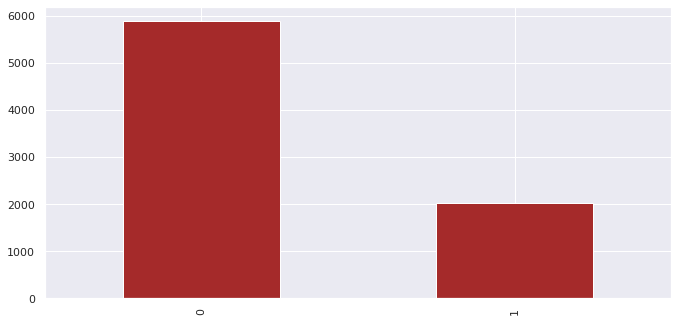

In [0]:
# checking the distribution of label counts in the train data

train['label'].value_counts().plot.bar(color = 'brown', figsize = (10,5))

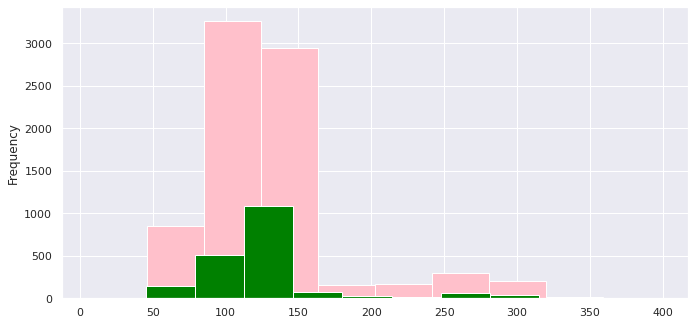

In [0]:
# checking the distribution of tweets in the whole dataset

length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (10, 5))
length_test = test['tweet'].str.len().plot.hist(color = 'green', figsize = (10,5))

In [0]:
# adding a column to check for the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] =  test['tweet'].str.len()

In [0]:
# checking the newly added column that checks the length of a tweet
train.head(10)

,id,label,tweet,len
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,128
1,2,0,Finally a transparant silicon case ^^ Thanks t...,131
2,3,0,We love this! Would you go? #talk #makememorie...,123
3,4,0,I'm wired I know I'm George I was made that wa...,112
4,5,1,What amazing service! Apple won't even talk to...,124
5,6,1,iPhone software update fucked up my phone big ...,65
6,7,0,Happy for us .. #instapic #instadaily #us #son...,100
7,8,0,New Type C charger cable #UK http://www.ebay.c...,259
8,9,0,Bout to go shopping again listening to music #...,130
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...,128


In [0]:
#checking the train length for the train data

train.groupby('label').describe()

id                                 ...    len                     
        count         mean          std  min  ...    25%    50%    75%    max
label                                         ...                            
0      5894.0  3954.497285  2290.734085  1.0  ...  114.0  126.0  133.0  398.0
1      2026.0  3977.962981  2274.419827  5.0  ...   84.0  106.0  124.0  330.0

[2 rows x 16 columns]

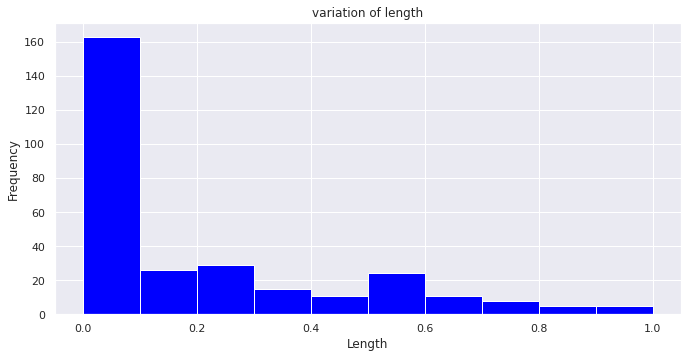

In [0]:
#variation of len in the train data

train.groupby('len').mean()['label'].plot.hist(color ='blue',figsize = (10,5))
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

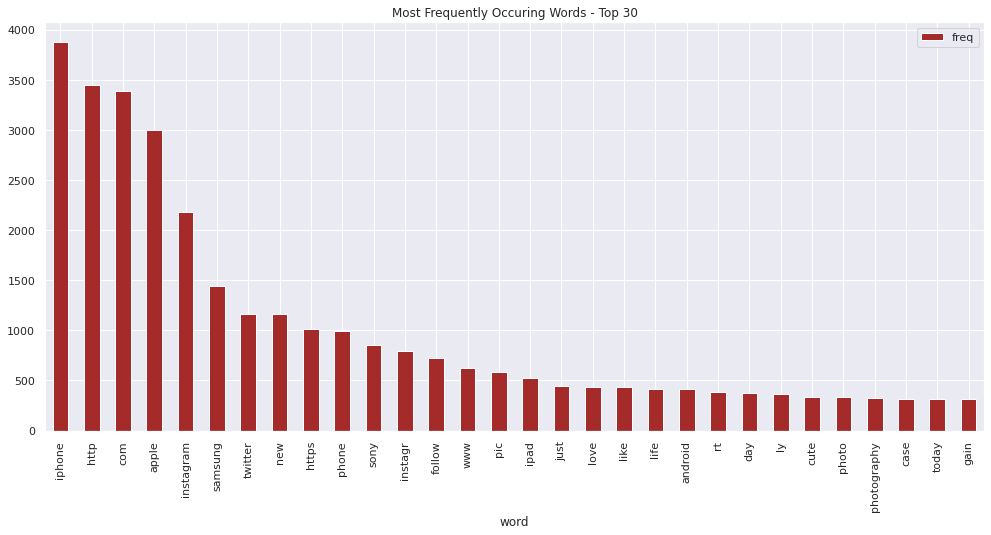

In [0]:
# count vectorization for the text
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'brown')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

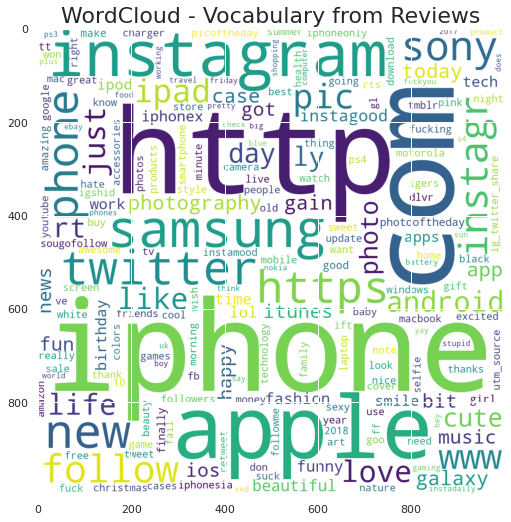

In [0]:
# generating word cloud for the most common occuring words in the train data
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

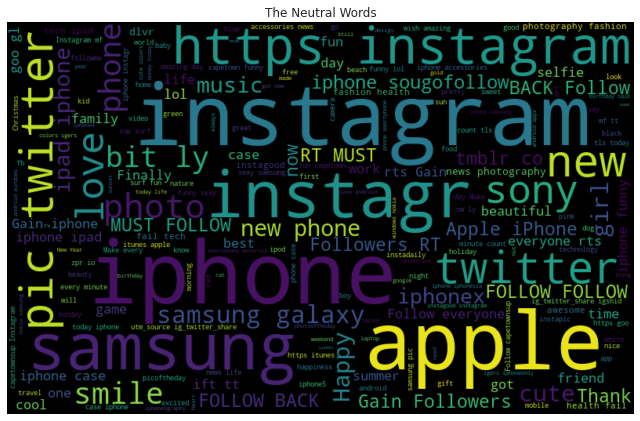

In [0]:
# wordcloud for words that are neutral
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

In [0]:
# defining a function to collect the hashtags from the train data
def hashtags_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    
    return hashtags
        

In [0]:
#extracting hashtags from racist/sexist tweet
ht_normal = hashtags_extract(train['tweet'][train['label'] == 0])

#extracting hashtags from normal tweet
ht_negetive = hashtags_extract(train['tweet'][train['label'] == 1])

#unnesting list

ht_normal = sum(ht_normal , [])
ht_negetive = sum(ht_negetive , [])


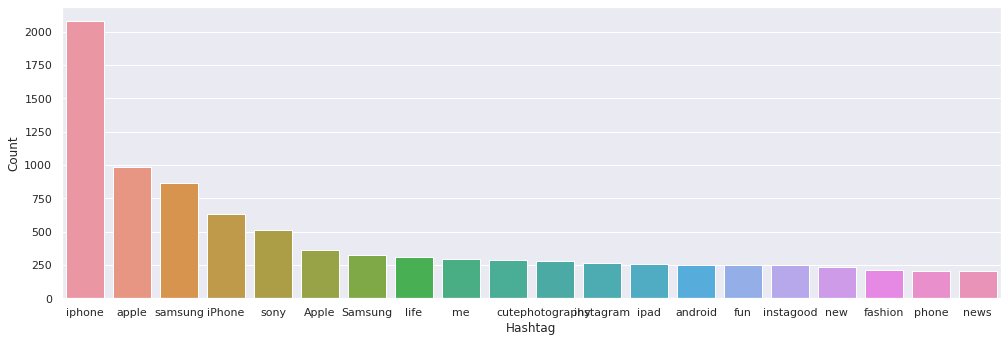

In [0]:
# Visualizing the most common hashtags in the train data
a = nltk.FreqDist(ht_normal)

d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(15,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()     


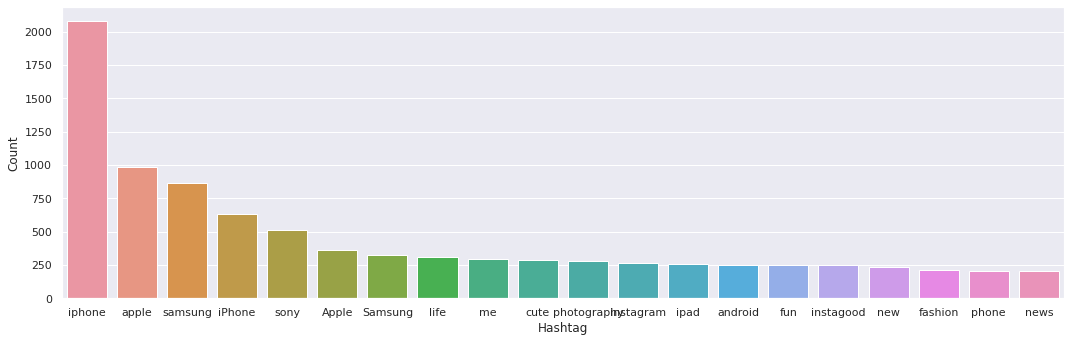

In [0]:
a = nltk.FreqDist(ht_normal)

d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

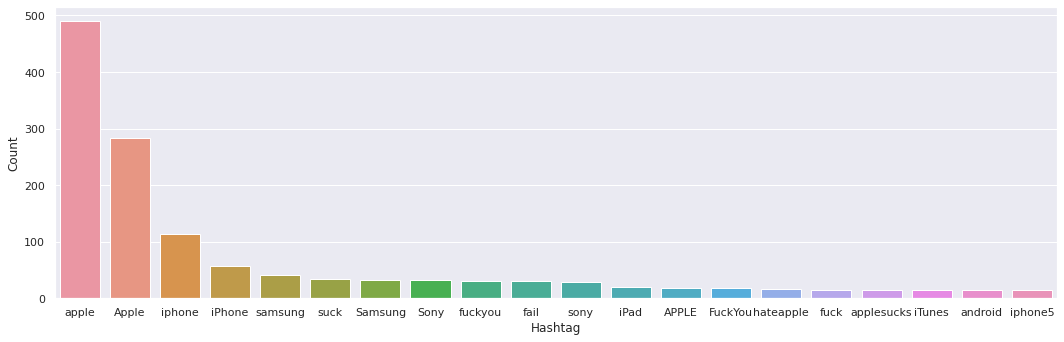

In [0]:
a = nltk.FreqDist(ht_negetive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [0]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(1873797, 2668000)

In [0]:
model_w2v.wv.most_similar(positive = "dinner")


[('screen,,', 0.9523272514343262),
 ('yup', 0.9414187669754028),
 ('happened.', 0.8850477933883667),
 ('use.', 0.874137282371521),
 ('Sueing', 0.8662956953048706),
 ('#furious', 0.8596137762069702),
 ("He's", 0.8568531274795532),
 ('wow', 0.8520885109901428),
 ('Ipad', 0.8485826253890991),
 ('bullshit,', 0.8478623628616333)]

In [0]:
model_w2v.wv.most_similar(positive = "fun")


[('Puppy', 0.7867317199707031),
 ('furry,', 0.7815762162208557),
 ('friendly', 0.7276402711868286),
 ('Rush', 0.7144684791564941),
 ('date', 0.6986318230628967),
 ('release', 0.6785433292388916),
 ('Part', 0.6746739149093628),
 ('….', 0.6653109788894653),
 ('cousin', 0.6652458310127258),
 ("We're", 0.6557401418685913)]

In [0]:
model_w2v.wv.most_similar(positive = "Sony")


[('Xperia', 0.7256543636322021),
 ('#Xperia', 0.685585618019104),
 ('#newlaptop', 0.6695915460586548),
 ('Playstation!', 0.6563071012496948),
 ('#C800G', 0.6482306718826294),
 ('unboxing', 0.6425521969795227),
 ('#BAM', 0.6403529047966003),
 ('ps4', 0.6368749737739563),
 ('#walkman', 0.6355713605880737),
 ('killed', 0.6355421543121338)]

In [0]:
model_w2v.wv.most_similar(negative = "Sony")


[('RT', -0.1649928092956543),
 ('#itunes', -0.1657414436340332),
 ('#justinbieber', -0.1682284027338028),
 ('New', -0.1701425313949585),
 ('#ipad', -0.17363867163658142),
 ('#bless', -0.17391890287399292),
 ('App', -0.17903262376785278),
 ('High', -0.1791670024394989),
 ('#music', -0.18515810370445251),
 ('June', -0.19297882914543152)]

In [0]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [0]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

[LabeledSentence(words=['#fingerprint', '#Pregnancy', 'Test', 'https://goo.gl/h1MfQV', '#android', '#apps', '#beautiful', '#cute', '#health', '#igers', '#iphoneonly', '#iphonesia', '#iphone'], tags=['tweet_0']),
 LabeledSentence(words=['Finally', 'a', 'transparant', 'silicon', 'case', '^^', 'Thanks', 'to', 'my', 'uncle', ':)', '#yay', '#Sony', '#Xperia', '#S', '#sonyexperias…', 'http://instagram.com/p/YGEt5JC6JM/'], tags=['tweet_1']),
 LabeledSentence(words=['We', 'love', 'this!', 'Would', 'you', 'go?', '#talk', '#makememories', '#unplug', '#relax', '#iphone', '#smartphone', '#wifi', '#connect...', 'http://fb.me/6N3LsUpCu'], tags=['tweet_2']),
 LabeledSentence(words=["I'm", 'wired', 'I', 'know', "I'm", 'George', 'I', 'was', 'made', 'that', 'way', ';)', '#iphone', '#cute', '#daventry', '#home', 'http://instagr.am/p/Li_5_ujS4k/'], tags=['tweet_3']),
 LabeledSentence(words=['What', 'amazing', 'service!', 'Apple', "won't", 'even', 'talk', 'to', 'me', 'about', 'a', 'question', 'I', 'have', 

In [0]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
train_corpus = []

for i in range(0, 7920):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
   # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)
 

In [0]:
# creating bag of words for train
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 1500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)


(7920, 1500)
(7920,)


In [0]:
# creating bag of words for test

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 1500)
x_test = cv.fit_transform(test_corpus).toarray()
y = train.iloc[:, 1]

print(x_test.shape)

(1953, 1500)


In [0]:
test_corpus = []

for i in range(0, 1953):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [0]:

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(5940, 1500)
(1980, 1500)
(5940,)
(1980,)


In [0]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

Training Accuracy : 0.9994949494949495
Validation Accuracy : 0.8853535353535353
F1 score : 0.7926940639269406


In [0]:
# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

[[1319  120]
 [ 107  434]]


In [0]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9994949494949495
Validation Accuracy : 0.8378787878787879
f1 score : 0.700280112044818
[[1284  155]
 [ 166  375]]


In [0]:
# trying SVC algorithm on the data
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9644781144781145
Validation Accuracy : 0.8621212121212121
f1 score : 0.7222787385554426
[[1352   87]
 [ 186  355]]


In [0]:
# trying xgboost classifier on the data
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.8882154882154882
Validation Accuracy : 0.8792929292929293
f1 score : 0.7912663755458514
[[1288  151]
 [  88  453]]


In [0]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9757575757575757
Validation Accuracy : 0.8323232323232324
f1 score : 0.6897196261682242
[[1279  160]
 [ 172  369]]


So, after using 5 algortihms on the train data and testing the same on the test data we can fairly come to a conclusion that Random Forest algorithm has yielded the highest accuracy amongst all the remaining algos which has succesfully classified the tweets as postive and negetive with an accuracy of 79.2%.   